In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("glass.csv")
df.shape

(214, 10)

In [2]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [3]:
#Label Encoding the obj Dtypes
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for column in df.select_dtypes(include=["object"]):
    df[column] = LE.fit_transform(df[column])
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
#choosing X and Y variables
y=df["Type"]
x=df.iloc[:,0:9]
x.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [5]:
#standardization will fit the values b/w -3 to +3

from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
SS_x = SS.fit_transform(x)
SS_x = pd.DataFrame(SS_x)
#giving columns names to the converted data
SS_x.columns = list(x)
SS_x.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [6]:
#Data partition
#test_size = 0.30 (train:test = 70:30)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(SS_x,y,test_size=0.30)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(149, 9)
(65, 9)
(149,)
(65,)


In [7]:
#KNN APPORACH #assuming k=5
#fitting model
from sklearn.metrics import accuracy_score
for i in range(1,21,2):
  from sklearn.neighbors import KNeighborsClassifier
  KNN = KNeighborsClassifier(n_neighbors=i)
  #model fitting
  KNN.fit(x_train,y_train)
  y_pred_train = KNN.predict(x_train)
  y_pred_test = KNN.predict(x_test)
  ac1=accuracy_score(y_train,y_pred_train)
  ac2=accuracy_score(y_test,y_pred_test)
  print("Trainig accuracy for","k = ",i," ",ac1.round(3))
  print("Test accuracy for","k = ",i," ",ac2.round(3))
  print("Variance between Training and Testing :",(ac1-ac2).round(3))
  print(" ")



Trainig accuracy for k =  1   1.0
Test accuracy for k =  1   0.662
Variance between Training and Testing : 0.338
 
Trainig accuracy for k =  3   0.839
Test accuracy for k =  3   0.615
Variance between Training and Testing : 0.224
 
Trainig accuracy for k =  5   0.772
Test accuracy for k =  5   0.662
Variance between Training and Testing : 0.11
 
Trainig accuracy for k =  7   0.732
Test accuracy for k =  7   0.677
Variance between Training and Testing : 0.055
 
Trainig accuracy for k =  9   0.711
Test accuracy for k =  9   0.646
Variance between Training and Testing : 0.065
 
Trainig accuracy for k =  11   0.685
Test accuracy for k =  11   0.631
Variance between Training and Testing : 0.054
 
Trainig accuracy for k =  13   0.651
Test accuracy for k =  13   0.677
Variance between Training and Testing : -0.026
 
Trainig accuracy for k =  15   0.651
Test accuracy for k =  15   0.646
Variance between Training and Testing : 0.005
 
Trainig accuracy for k =  17   0.671
Test accuracy for k =  

In [8]:
#cross validation by KNN
#k=15
#cross validation method
#validation set approach
#random state = we wre not shuffling the data
#test_size = 0.30 (train:test = 70:30)
for i in range(1,21,2):
  from sklearn.model_selection import train_test_split
  from sklearn.neighbors import KNeighborsClassifier
  KNN = KNeighborsClassifier(n_neighbors=i)
  training_accuracy = []
  test_accuracy = []
  for p in range(1,101):
    x_train,x_test,y_train,y_test = train_test_split(SS_x,y,test_size=0.30,random_state=p)
    KNN.fit(x_train,y_train)
    y_pred_train = KNN.predict(x_train)
    y_pred_test = KNN.predict(x_test)
    training_accuracy.append(accuracy_score(y_train,y_pred_train))
    test_accuracy.append(accuracy_score(y_test,y_pred_test))
    ac1=np.mean(training_accuracy)
    ac2=np.mean(test_accuracy)
  print("Cross validation Trainig accuracy for ","k =",i,": ",np.mean(training_accuracy).round(2))
  print("Cross validation Test accuracy for ","k =",i,": ",np.mean(test_accuracy).round(2))
  print("Variance between Training and Testing :","for k=",i,":",(ac1-ac2).round(3))
  print(" ")

Cross validation Trainig accuracy for  k = 1 :  1.0
Cross validation Test accuracy for  k = 1 :  0.7
Variance between Training and Testing : for k= 1 : 0.302
 
Cross validation Trainig accuracy for  k = 3 :  0.82
Cross validation Test accuracy for  k = 3 :  0.67
Variance between Training and Testing : for k= 3 : 0.15
 
Cross validation Trainig accuracy for  k = 5 :  0.74
Cross validation Test accuracy for  k = 5 :  0.64
Variance between Training and Testing : for k= 5 : 0.102
 
Cross validation Trainig accuracy for  k = 7 :  0.71
Cross validation Test accuracy for  k = 7 :  0.64
Variance between Training and Testing : for k= 7 : 0.076
 
Cross validation Trainig accuracy for  k = 9 :  0.7
Cross validation Test accuracy for  k = 9 :  0.63
Variance between Training and Testing : for k= 9 : 0.069
 
Cross validation Trainig accuracy for  k = 11 :  0.69
Cross validation Test accuracy for  k = 11 :  0.63
Variance between Training and Testing : for k= 11 : 0.061
 
Cross validation Trainig accu

In [ ]:
#Hence for k=9, is the best fit for this model. we are getting low variance (0.07)
#Training and Test accuracies are better compared to other K values

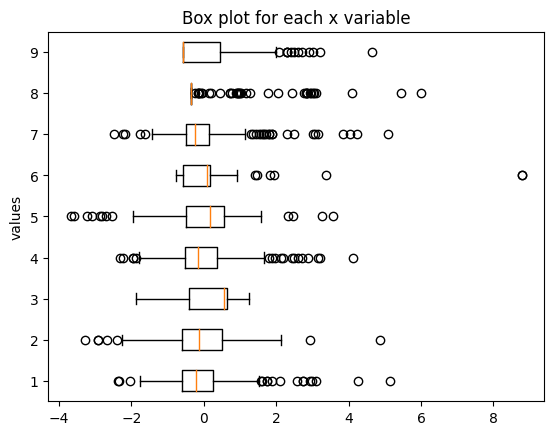

In [9]:
#-------------------Univariate analysis-----------------------------------------------
#constructing box for all x_variables value counts
#Visualizing the data
import matplotlib.pyplot as plt
plt.boxplot(SS_x,vert=False)
plt.title("Box plot for each x variable")
plt.ylabel("values")
plt.show()

array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>]], dtype=object)

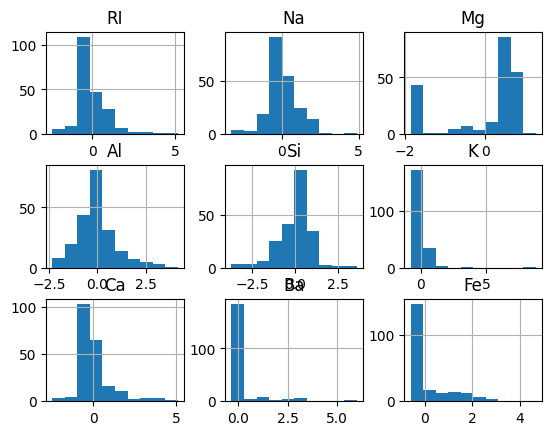

In [10]:
#-------------------Univariate analysis-----------------------------------------------
#constructing histogram for all x_variables value counts
SS_x.hist()

In [16]:
##-------------------Univariate analysis-----------------------------------------------
#constructing pie-chart for each variable value counts

import matplotlib.pyplot as plt
for column in df.select_dtypes(include=["float64"]):
  df[column].value_counts().plot(kind='pie',autopct='%1.2f%%')
  plt.title("Pie chart")
  plt.legend(title="catogery color") #gives which color is for which one
  plt.show()


Output hidden; open in https://colab.research.google.com to view.

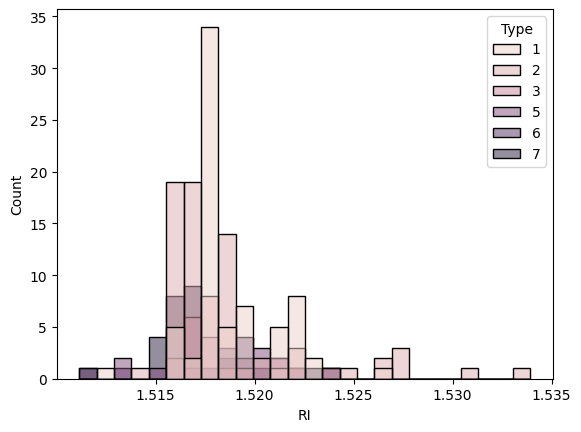

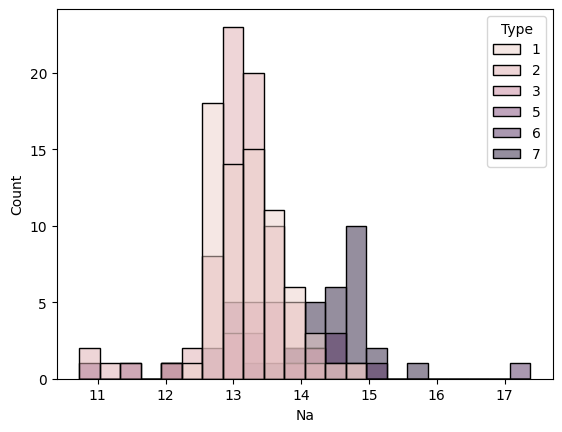

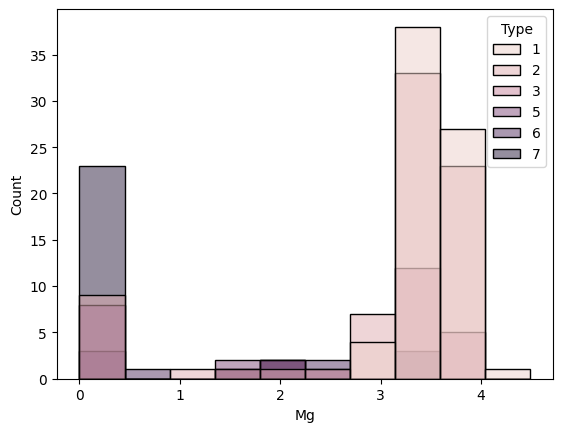

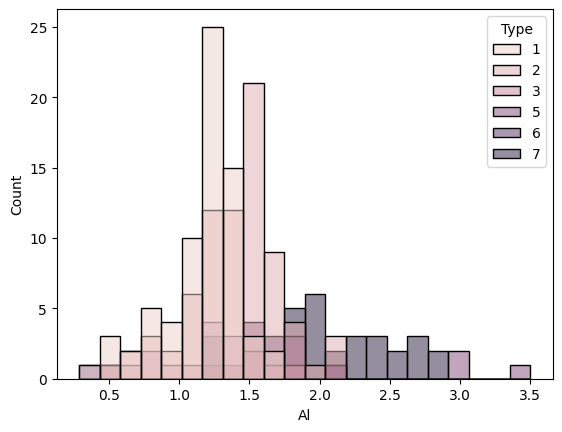

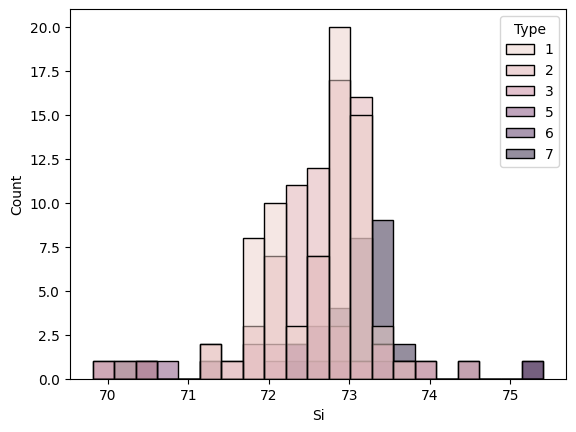

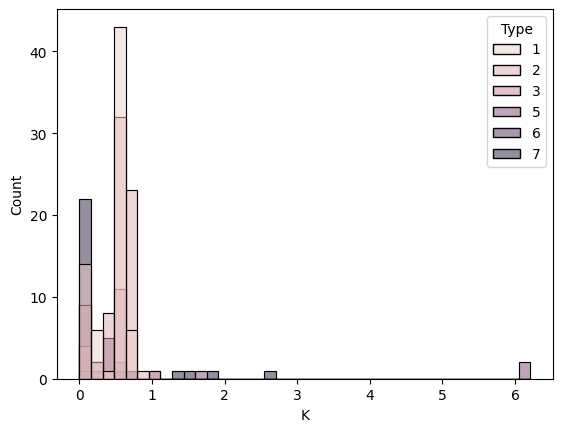

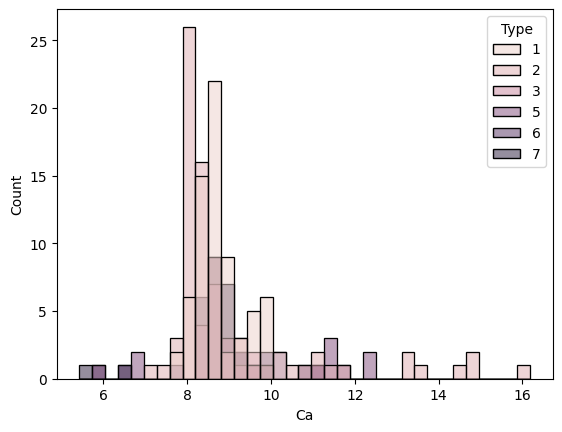

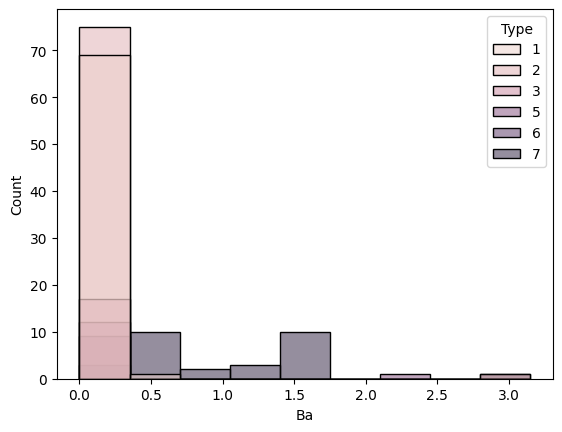

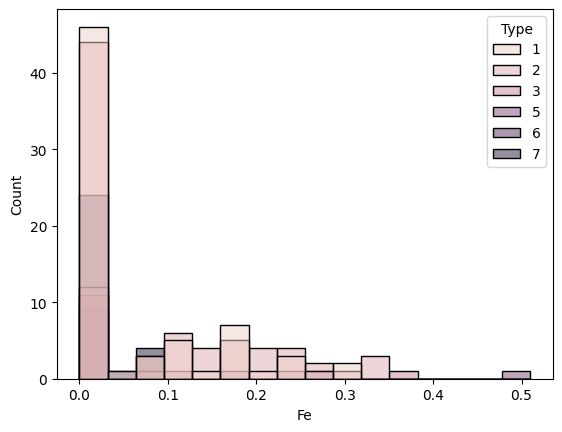

In [19]:
#---------------Bivariate analysis-----------------------------------------------------
#constructiing the histogram plot for all X variables based on type
import seaborn as sns
#Histogram for each feature with type
for column in df.select_dtypes(include=["float64"]):
    sns.histplot(x=df[column], hue=df['Type'])
    plt.show()

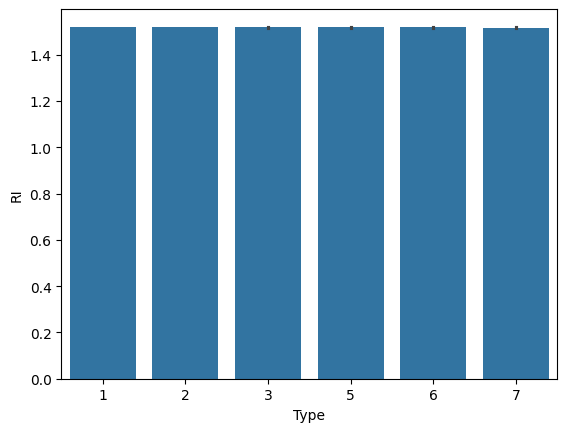

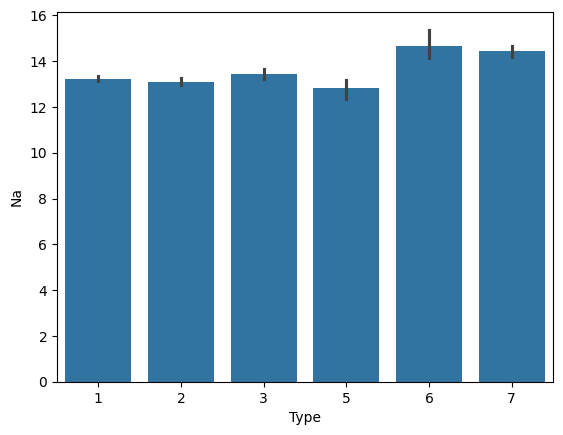

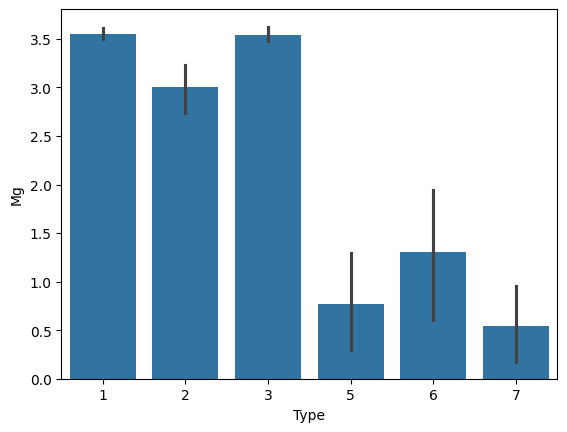

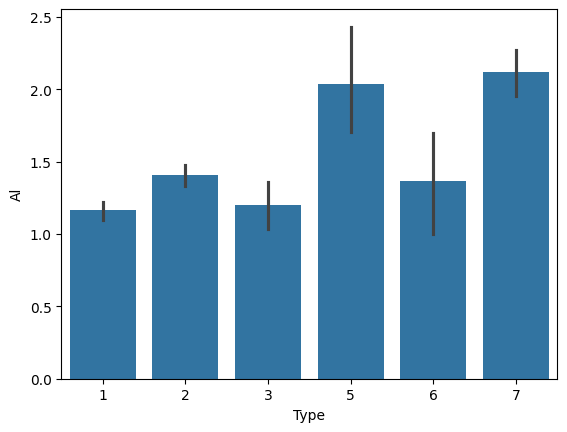

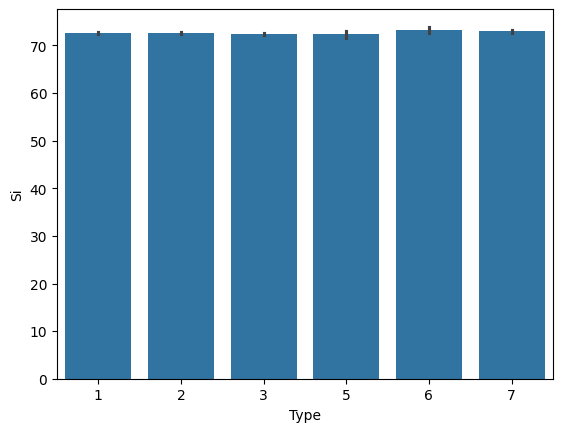

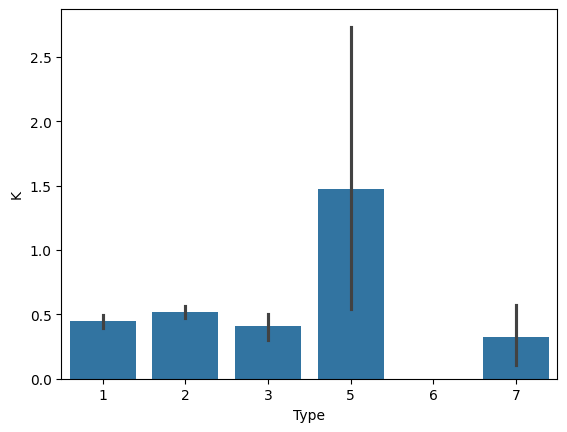

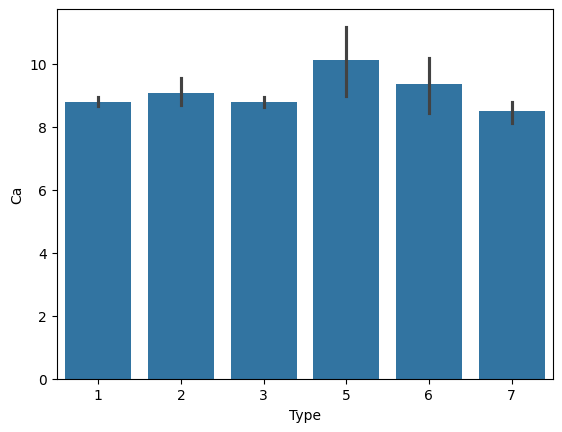

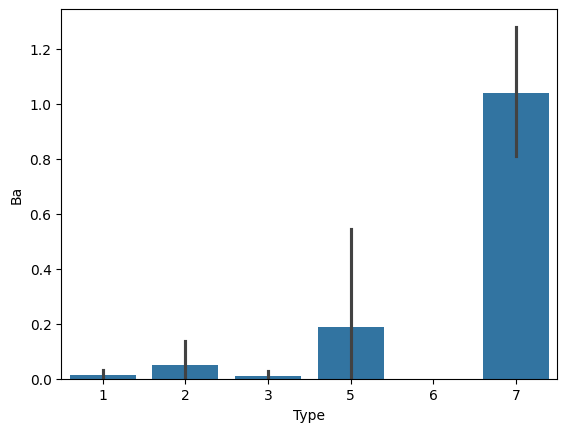

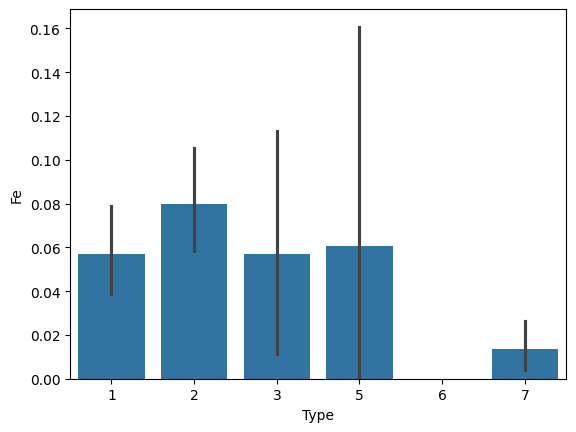

In [21]:
##Bar graph for every x- variable with type

import matplotlib.pyplot as plt
for column in df.select_dtypes(include=["float64"]):
  sns.barplot(x=df['Type'], y=df[column])
  plt.show()
